In [69]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from ipdb import set_trace
import matplotlib.pyplot as plt
from tensorflow.keras import Model

In [70]:
bs=256
lmbda=0.0

In [71]:
mnist_train=tfds.load(name='mnist',split='train').repeat().shuffle(1024).batch(bs)

In [72]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [73]:
initial = tf.initializers.he_normal()
class DEC_enc(Model):
    def __init__(self):
        super(DEC_enc,self).__init__()
        self.w1 = tf.Variable(initial_value=initial(shape=[784,500]), name='weights1',shape=(784,500))
        self.b1 = tf.Variable(tf.zeros(500), name='bias1')
        self.w2 = tf.Variable(initial_value=initial(shape=[500,500]), name='weights1')
        self.b2 = tf.Variable(tf.zeros(500), name='bias1')
        self.w3 = tf.Variable(initial_value=initial(shape=[500,2000]), name='weights1')
        self.b3 = tf.Variable(tf.zeros(2000), name='bias1')
        self.w4 = tf.Variable(initial_value=initial(shape=[2000,10]), name='weights1')
        self.b4 = tf.Variable(tf.zeros(10), name='bias1')
        self.bn1 = tf.compat.v1.layers.BatchNormalization()
        self.bn2 = tf.compat.v1.layers.BatchNormalization()
        self.bn3 = tf.compat.v1.layers.BatchNormalization()
        self.bn4 = tf.compat.v1.layers.BatchNormalization()
        self.vars = [self.w1,self.b1,self.w2,self.b2,self.w3,self.b3,self.w4,self.b4]


    def __call__(self,x):
        x = x@self.w1 + self.b1
        x = tf.nn.relu(x)
        x=self.bn1(x)
        x = x@self.w2 + self.b2
        x = tf.nn.relu(x)
        try: x=self.bn2(x)
        except: set_trace()
        x = x@self.w3 + self.b3
        x = tf.nn.relu(x)
        x=self.bn3(x)
        x = x@self.w4 + self.b4
        return x

class DEC_dec():
    def __init__(self):
        super(DEC_dec,self).__init__()
        self.w1 = tf.Variable(initial_value=initial(shape=[10,2000]), name='weights1')
        self.b1 = tf.Variable(tf.zeros(2000), name='bias1')
        self.w2 = tf.Variable(initial_value=initial(shape=[2000,500]), name='weights1')
        self.b2 = tf.Variable(tf.zeros(500), name='bias1')
        self.w3 = tf.Variable(initial_value=initial(shape=[500,500]), name='weights1')
        self.b3 = tf.Variable(tf.zeros(500), name='bias1')
        self.w4 = tf.Variable(initial_value=initial(shape=[500,784]), name='weights1')
        self.b4 = tf.Variable(tf.zeros(784), name='bias1')
        self.bn1 = tf.compat.v1.layers.BatchNormalization()
        self.bn2 = tf.compat.v1.layers.BatchNormalization()
        self.bn3 = tf.compat.v1.layers.BatchNormalization()
        self.bn4 = tf.compat.v1.layers.BatchNormalization()
        self.vars = [self.w1,self.b1,self.w2,self.b2,self.w3,self.b3,self.w4,self.b4]

    def __call__(self,x):
        x = x@self.w1 + self.b1
        x = tf.nn.relu(x)
        x=self.bn1(x)
        x = x@self.w2 + self.b2
        x = tf.nn.relu(x)
        x=self.bn2(x)
        x = x@self.w3 + self.b3
        x = tf.nn.relu(x)
        x=self.bn3(x)
        x = x@self.w4 + self.b4
        return tf.nn.tanh(x)

In [74]:
initial = tf.initializers.he_normal()
class Conv_enc(Model):
    def __init__(self):
        super(DEC_enc,self).__init__()
        self.w1 = tf.Variable(initial_value=initial(shape=[784,500]), name='weights1',shape=(784,500))
        self.b1 = tf.Variable(tf.zeros(500), name='bias1')
        self.w2 = tf.Variable(initial_value=initial(shape=[500,500]), name='weights1')
        self.b2 = tf.Variable(tf.zeros(500), name='bias1')
        self.w3 = tf.Variable(initial_value=initial(shape=[500,2000]), name='weights1')
        self.b3 = tf.Variable(tf.zeros(2000), name='bias1')
        self.w4 = tf.Variable(initial_value=initial(shape=[2000,10]), name='weights1')
        self.b4 = tf.Variable(tf.zeros(10), name='bias1')
        self.bn1 = tf.compat.v1.layers.BatchNormalization()
        self.bn2 = tf.compat.v1.layers.BatchNormalization()
        self.bn3 = tf.compat.v1.layers.BatchNormalization()
        self.bn4 = tf.compat.v1.layers.BatchNormalization()
        self.vars = [self.w1,self.b1,self.w2,self.b2,self.w3,self.b3,self.w4,self.b4]


    def __call__(self,x):
        x = x@self.w1 + self.b1
        x = tf.nn.relu(x+0.5)-0.5
        x=self.bn1(x)
        x = x@self.w2 + self.b2
        x = tf.nn.relu(x+0.5)-0.5
        try: x=self.bn2(x)
        except: set_trace()
        x = x@self.w3 + self.b3
        x = tf.nn.relu(x+0.5)-0.5
        x=self.bn3(x)
        x = x@self.w4 + self.b4
        return x

class Conv_dec():
    def __init__(self):
        super(DEC_dec,self).__init__()
        self.w1 = tf.Variable(initial_value=initial(shape=[3,3,1,4]), name='weights1')
        self.b1 = tf.Variable(tf.zeros(4), name='bias1')
        self.w2 = tf.Variable(initial_value=initial(shape=[3,3,4,8]), name='weights1')
        self.b2 = tf.Variable(tf.zeros(8), name='bias1')
        self.w3 = tf.Variable(initial_value=initial(shape=[3,3,8,16]), name='weights1')
        self.b3 = tf.Variable(tf.zeros(16), name='bias1')
        self.w4 = tf.Variable(initial_value=initial(shape=[3,3,16,32]), name='weights1')
        self.b4 = tf.Variable(tf.zeros(32), name='bias1')
        self.w5 = tf.Variable(initial_value=initial(shape=[3,3,1,4]), name='weights1')
        self.b5 = tf.Variable(tf.zeros(4), name='bias1')
        self.w6 = tf.Variable(initial_value=initial(shape=[3,3,4,8]), name='weights1')
        self.b6 = tf.Variable(tf.zeros(8), name='bias1')
        self.w7 = tf.Variable(initial_value=initial(shape=[3,3,8,16]), name='weights1')
        self.b7 = tf.Variable(tf.zeros(16), name='bias1')
        self.w8 = tf.Variable(initial_value=initial(shape=[3,3,16,32]), name='weights1')
        self.b8 = tf.Variable(tf.zeros(32), name='bias1')
        self.bn1 = tf.compat.v1.layers.BatchNormalization()
        self.bn2 = tf.compat.v1.layers.BatchNormalization()
        self.bn3 = tf.compat.v1.layers.BatchNormalization()
        self.bn4 = tf.compat.v1.layers.BatchNormalization()
        self.bn5 = tf.compat.v1.layers.BatchNormalization()
        self.bn6 = tf.compat.v1.layers.BatchNormalization()
        self.bn7 = tf.compat.v1.layers.BatchNormalization()
        self.bn8 = tf.compat.v1.layers.BatchNormalization()
        self.vars = [self.w1,self.b1,self.w2,self.b2,self.w3,self.b3,self.w4,self.b4]

    def __call__(self,x):
        x = x@self.w1 + self.b1
        x = tf.nn.relu(x+0.5)-0.5
        x=self.bn1(x)
        x = x@self.w2 + self.b2
        x = tf.nn.relu(x+0.5)-0.5
        x=self.bn2(x)
        x = x@self.w3 + self.b3
        x = tf.nn.relu(x+0.5)-0.5
        x=self.bn3(x)
        x = x@self.w4 + self.b4
        return x

In [75]:
enc1 = DEC_enc()
enc2 = DEC_enc()
dec1 = DEC_dec()

cweights = tf.Variable(initial_value=initial(shape=[10,1]))
def crit(x): return enc2(x)@cweights

In [76]:
ropt = tf.optimizers.Adam(1e-4)
copt = tf.optimizers.Adam(1e-4)
closs_func = tf.nn.sigmoid_cross_entropy_with_logits
rloss_func = tf.losses.MeanAbsoluteError()
mse = tf.losses.MSE

tf.Tensor(0.49526685, shape=(), dtype=float32) tf.Tensor(1.2867469, shape=(), dtype=float32)
tf.Tensor(0.12980527, shape=(), dtype=float32) tf.Tensor(1.2986128, shape=(), dtype=float32)
tf.Tensor(0.12753206, shape=(), dtype=float32) tf.Tensor(1.2953727, shape=(), dtype=float32)
tf.Tensor(0.1310065, shape=(), dtype=float32) tf.Tensor(1.2922479, shape=(), dtype=float32)
tf.Tensor(0.13059121, shape=(), dtype=float32) tf.Tensor(1.289129, shape=(), dtype=float32)
tf.Tensor(0.12789392, shape=(), dtype=float32) tf.Tensor(1.2881004, shape=(), dtype=float32)
tf.Tensor(0.124239676, shape=(), dtype=float32) tf.Tensor(1.3083122, shape=(), dtype=float32)
tf.Tensor(0.13132022, shape=(), dtype=float32) tf.Tensor(1.2950115, shape=(), dtype=float32)
tf.Tensor(0.12705322, shape=(), dtype=float32) tf.Tensor(1.3009065, shape=(), dtype=float32)
tf.Tensor(0.12586589, shape=(), dtype=float32) tf.Tensor(1.2814822, shape=(), dtype=float32)
None
> <ipython-input-77-9041b37824ae>(28)<module>()
     27     if (ba

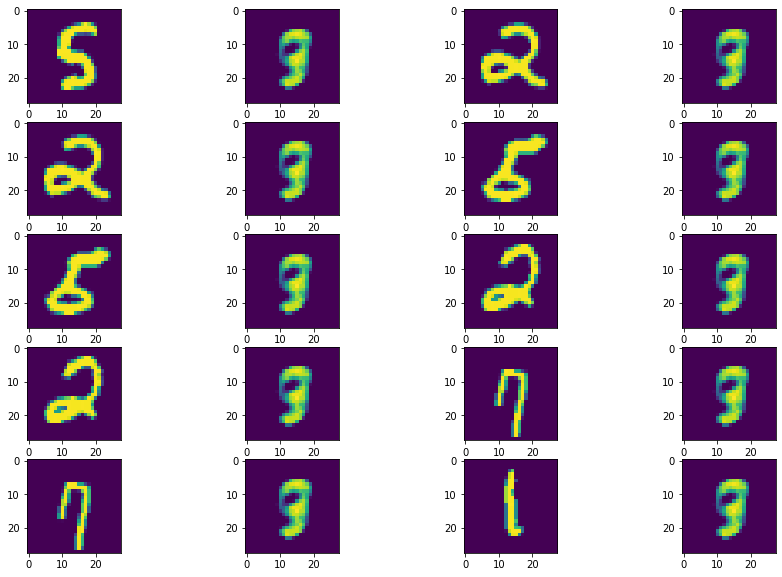

In [77]:
enc1.train,dec1.train,enc2.train = [True]*3
for batch_idx, dp in enumerate(mnist_train):
    with tf.GradientTape(persistent=True) as tape:
        alpha,gamma = tf.random.uniform([bs,1]),tf.random.uniform([bs,1])
        inp=tf.reshape(dp['image'],(-1,784))
        prev_latent = tf.Variable(tf.zeros([bs,10]) if batch_idx == 0 else latent)
        inp=tf.Variable(tf.dtypes.cast(inp,tf.dtypes.float32)/255.,trainable=False)
        latent = enc1(inp)
        preds = dec1(latent)
        pixel_interp = gamma*inp + (1-gamma)*preds
        latent_interp = dec1(alpha*latent + (1-alpha)*prev_latent)
        true_crit = crit(pixel_interp)
        alpha_crit = crit(latent_interp)
        rloss1 = rloss_func(inp,preds)
        rloss2 = mse(tf.zeros_like(alpha_crit),alpha_crit)
        closs1 = closs_func(tf.zeros_like(true_crit),true_crit)
        closs2 = closs_func(tf.broadcast_to(alpha,alpha_crit.shape),alpha_crit)
        rloss = tf.reduce_mean(rloss1+lmbda*rloss2)
        closs = tf.reduce_mean(closs1+closs2)
    rgrads = tape.gradient(rloss, enc1.vars+dec1.vars)
    ropt.apply_gradients(zip(rgrads,enc1.vars+dec1.vars))
    cgrads = tape.gradient(closs, enc2.vars+[cweights])
    copt.apply_gradients(zip(rgrads,enc1.vars+dec1.vars))
#         ropt.minimize(rloss,var_list=enc1.vars + dec1.vars)
#         copt.minimize(closs,var_list=enc2.vars)
    if batch_idx%50==0: print(rloss,closs)
    if (batch_idx+1)%500==0: set_trace()
    if rloss < 0.12: break
_, axes = plt.subplots(5,4,figsize=(15,10))
for i in range(5):
    axes[i,0].imshow(tf.reshape(inp[i],(28,28)))
    axes[i,1].imshow(tf.reshape(preds[i],(28,28)))
    axes[i,2].imshow(tf.reshape(inp[i+1],(28,28)))
    axes[i,3].imshow(tf.reshape(preds[i+1],(28,28)))
plt.show()

In [78]:
inp=tf.Variable(tf.ones([bs,784]))
def l(): return inp+1
# ropt.minimize(l,var_list=[test])
inp.trainable
# inp.value()

True

In [79]:
w5 = tf.Variable(initial_value=initial(shape=[10,2000]), name='weights1')
b5 = tf.Variable(tf.zeros(2000), name='bias1')
w6 = tf.Variable(initial_value=initial(shape=[2000,500]), name='weights1')
b6 = tf.Variable(tf.zeros(500), name='bias1')
w7 = tf.Variable(initial_value=initial(shape=[500,500]), name='weights1')
b7 = tf.Variable(tf.zeros(500), name='bias1')
w8 = tf.Variable(initial_value=initial(shape=[500,784]), name='weights1')
b8 = tf.Variable(tf.zeros(784), name='bias1')

In [80]:
b8 = 

SyntaxError: invalid syntax (<ipython-input-80-763e066959be>, line 1)